# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [1]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#Sample Set for testing code
#lats = np.random.uniform(lat_range[0], lat_range[1], size=100)
#lngs = np.random.uniform(lng_range[0], lng_range[1], size=100)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(cities)

# Print the city count to confirm sufficient count
len(cities)


NameError: name 'np' is not defined

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create a base url
base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#print(base_url)

# Create the lists to hold relative data
found_cities =[]
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Create a query url for each city in the cities list to get json response

print("Processing API calls from Open Weather")
for city in cities:
    
    time.sleep(1)
         
    # Create API url for each city
    query_url = base_url +"&q=" + city

    
    # Get json respose for each city
    response = requests.get(query_url).json()

   # Add the values to the lists
    try:       
        found_cities.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])

        print(f"{city} was found in weather data") 
        
    except KeyError:
        print(f"{city} not found. Skipped")
        pass
        
print("End of City list")



Processing API calls from Open Weather
maltahohe was found in weather data
mount isa was found in weather data
rikitea was found in weather data
mataura was found in weather data
tuktoyaktuk was found in weather data
palmas was found in weather data
port elizabeth was found in weather data
taolanaro not found. Skipped
alamos was found in weather data
punta arenas was found in weather data
cape town was found in weather data
novo aripuana was found in weather data
ushuaia was found in weather data
juneau was found in weather data
sukhovolya was found in weather data
tazovskiy was found in weather data
carutapera was found in weather data
mayumba was found in weather data
puertollano was found in weather data
atuona was found in weather data
albany was found in weather data
puqi was found in weather data
guasdualito was found in weather data
amderma not found. Skipped
sao filipe was found in weather data
kloulklubed was found in weather data
hilo was found in weather data
lodwar was foun

petropavlovsk-kamchatskiy was found in weather data
digby was found in weather data
kirakira was found in weather data
palm coast was found in weather data
prainha was found in weather data
floriano was found in weather data
nyuksenitsa was found in weather data
kahului was found in weather data
vao was found in weather data
chuy was found in weather data
sambava was found in weather data
airai was found in weather data
ngunguru was found in weather data
guelph was found in weather data
show low was found in weather data
pyu was found in weather data
brae was found in weather data
manaure was found in weather data
salinopolis was found in weather data
ilo was found in weather data
boa vista was found in weather data
gorontalo was found in weather data
arawa was found in weather data
lashio was found in weather data
kodiak was found in weather data
hami was found in weather data
port hardy was found in weather data
turbat was found in weather data
krasnoselkup was found in weather data


klaksvik was found in weather data
arrecife was found in weather data
turukhansk was found in weather data
providencia was found in weather data
henties bay was found in weather data
gorno-chuyskiy not found. Skipped
kamenka was found in weather data
hervey bay was found in weather data
saint-pierre was found in weather data
palafrugell was found in weather data
sfantu gheorghe was found in weather data
porto novo was found in weather data
anadyr was found in weather data
atasu was found in weather data
saint andrews was found in weather data
dicabisagan was found in weather data
apache junction was found in weather data
esso was found in weather data
rincon was found in weather data
kirovskiy was found in weather data
merrill was found in weather data
tabukiniberu not found. Skipped
arman was found in weather data
maniitsoq was found in weather data
pasighat was found in weather data
bintulu was found in weather data
yerbogachen was found in weather data
saldanha was found in weather 

In [49]:
#Create Dictionary

weather_raw_data = {
    "City": found_cities,
    "Latitude": lat,
    "Lng": lng,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
    "Date":date
    }

#Create Data Frame
weather_df = pd.DataFrame.from_dict(weather_raw_data, orient= 'columns')

#export to cs
weather_df.to_csv("output_data/cities.csv", index = False)
weather_df

,City,Latitude,Lng,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,Maltahöhe,-24.83,16.98,0,NA,1603134554,19,73.06,16.13
1,Mount Isa,-20.73,139.50,0,AU,1603134416,19,77.00,5.82
2,Rikitea,-23.12,-134.97,0,PF,1603134064,79,73.89,14.74
3,Mataura,-46.19,168.86,94,NZ,1603133966,69,50.00,17.00
4,Tuktoyaktuk,69.45,-133.04,92,CA,1603134354,97,22.60,5.59
...,...,...,...,...,...,...,...,...,...
586,Susanville,40.42,-120.65,1,US,1603135035,26,71.01,3.36
587,Leh,34.17,77.58,0,IN,1603135229,48,37.42,8.52
588,Phu Ly,20.54,105.91,100,VN,1603134977,85,65.08,10.04
589,Acajutla,13.59,-89.83,20,SV,1603135231,55,87.80,4.70


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

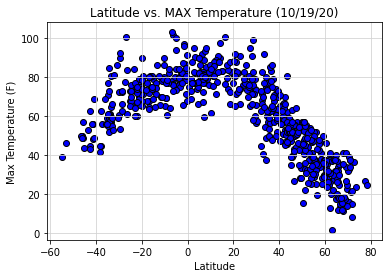

In [50]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Max Temp'],edgecolors='black',facecolors='b')

#title and labels
plt.title(f'Latitude vs. MAX Temperature ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f'images/Latitude vs. MAX Temperature.png')

### Latitude vs. Humidity Plot

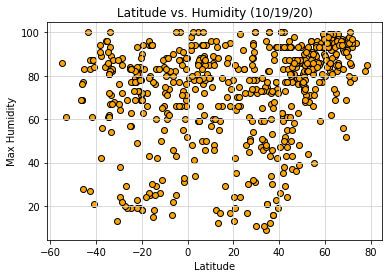

In [51]:
#create plot
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],edgecolors='black',facecolors='orange')

#title and labels
plt.title(f'Latitude vs. Humidity ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Humidity')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"Images/Latitude vs. Humidity.png")

### Latitude vs. Cloudiness Plot

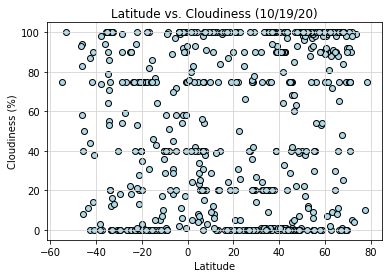

In [52]:
#Create Plot
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],edgecolors='black',facecolors='lightblue')

#titles and lables
plt.title(f'Latitude vs. Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')

#Save Plot
plt.savefig(f"images/Latitude vs. Cloudiness.png")

### Latitude vs. Wind Speed Plot

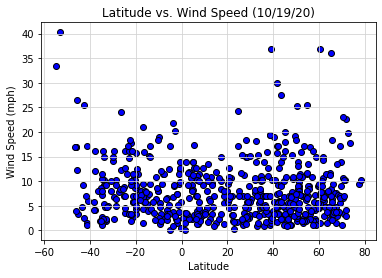

In [53]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors='b')
plt.title(f'Latitude vs. Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
plt.savefig(f'images/City Latitude vs. Wind Speed.png')

## Linear Regression

### Write linear regression plot function (optional)

In [64]:
#create hemispheres
north_hem = weather_df.loc[weather_df["Latitude"] >= 0]
south_hem = weather_df.loc[weather_df["Latitude"] < 0]


In [81]:
# Define function
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.grid (b=True,which='major',axis='both',linestyle='-',color='lightgrey')
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="orange")

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


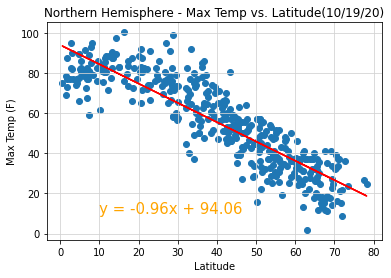

In [82]:
#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Max Temp"])
annotate(equation, 10, 10)

#title and labels
plt.title(f'Northern Hemisphere - Max Temp vs. Latitude({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save the figure
plt.savefig(f"Images/Northern Hemisphere | Max Temp vs. Latitude Regression.png")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.71


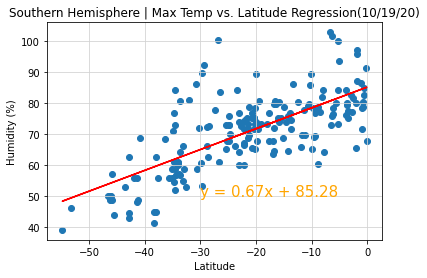

In [83]:
#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Max Temp"])
annotate(equation, -30, 50)

#title and labels
plt.title(f'Southern Hemisphere | Max Temp vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/Southern Hemisphere | Max Temp vs. Latitude Regression.png")

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.29


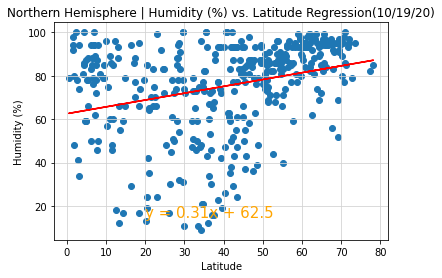

In [84]:
#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Humidity"])
annotate(equation, 20, 15)

#title and labels
plt.title(f'Northern Hemisphere | Humidity (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig(f"Images/Northern Hemisphere | Humidity (%) vs. Latitude Regression.png")

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.08


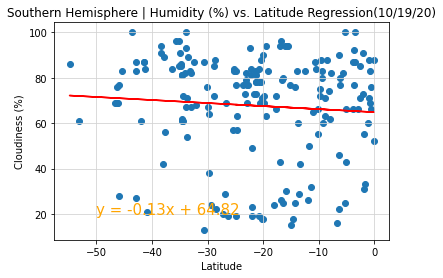

In [85]:
#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Humidity"])
annotate(equation, -50, 20)

#title and labels
plt.title(f'Southern Hemisphere | Humidity (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"Images/Southern Hemisphere | Humidity (%) vs. Latitude Regression.png")

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.21


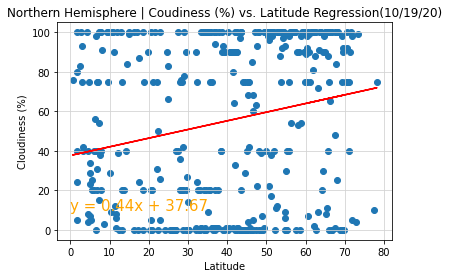

In [86]:
#plot variable
title_5 = "Northern Hemisphere - Cloudiness vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Cloudiness"])
annotate(equation, 0, 10)

#title and labels
plt.title(f'Northern Hemisphere | Coudiness (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"images/Northern Hemisphere | Cloudiness (%) vs. Latitude Regression.png")

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : -0.02


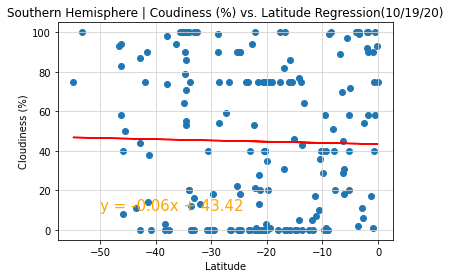

In [87]:
#use functions
equation = linear_regression(south_hem["Latitude"],south_hem["Cloudiness"])
annotate(equation, -50, 10)

#title and labels
plt.title(f'Southern Hemisphere | Coudiness (%) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig(f"images/Southern Hemisphere | Cloudiness (%) vs. Latitude Regression.png")

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


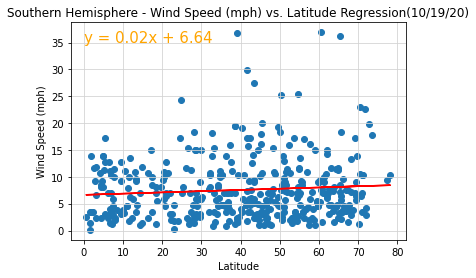

In [88]:
#plot variable
title_7 = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression"

#use functions
equation = linear_regression(north_hem["Latitude"],north_hem["Wind Speed"])
annotate(equation, 0, 35)

#title and labels
plt.title(f'Southern Hemisphere - Wind Speed (mph) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig(f"images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression.png")

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.08


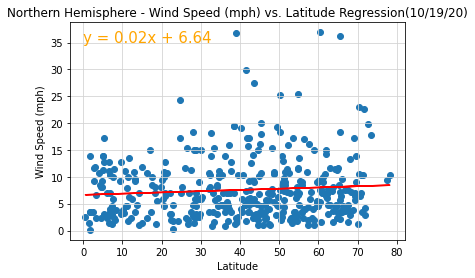

In [90]:
#use functions
equation = linear_regression(north_hem['Latitude'],north_hem['Wind Speed'])
annotate(equation, 0, 35)

#title and labels
plt.title(f'Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression({datetime.datetime.now().strftime("%D")})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Save the figure
plt.savefig(f'images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Regression.png')